In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import shutil
import numpy as np

from torch import Generator
from torch.utils.data import Dataset, DataLoader, Subset, random_split, SubsetRandomSampler
from sklearn.model_selection import train_test_split

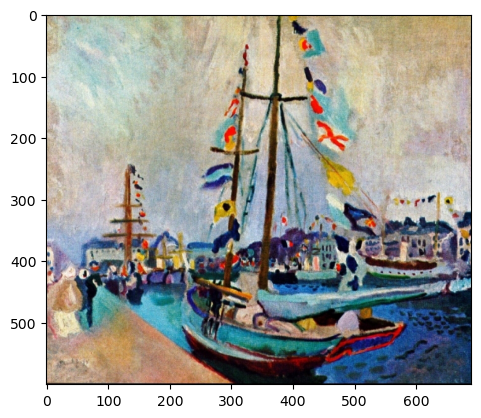

In [2]:
base_path = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Pandora_18k_Merged\\"

folders = [ f.path for f in os.scandir(base_path) if f.is_dir() ]
classes_names = [ f.name for f in os.scandir(base_path) if f.is_dir() ]
classes = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"]


image_path_by_class = []
aux_str = []

for folder in folders:
    aux_str = folder + "//" + "*.jpg"
    image_path_by_class.append(glob.glob(aux_str))

test_img = cv2.imread(image_path_by_class[12][2])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

In [3]:
labels = []
for index, class_path in enumerate(image_path_by_class):
  tmp = []
  for img_path in class_path:
    label = img_path.split("\\")[6]
    tmp.append(label)
  labels.append(tmp)

labels=np.array(labels)

print(len(labels[1]))
print(len(image_path_by_class[1]))

len(labels)


731
731


C:\Users\Teodora\AppData\Local\Temp\ipykernel_16028\567147042.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels=np.array(labels)


18

18_PopArt


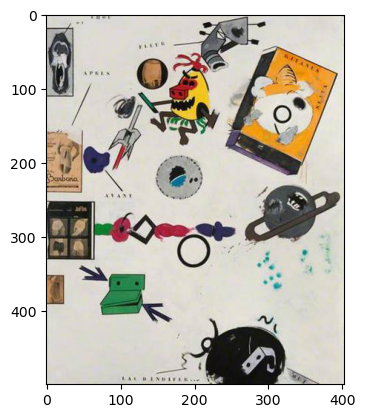

In [15]:
class_name = 17
picture = 100

test_img = cv2.imread(image_path_by_class[class_name][picture])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

print(labels[class_name][picture])

In [31]:
data = image_path_by_class
data = []
labels_merged = []
for class_index in range(len(image_path_by_class)):
    for img_index in range(len(image_path_by_class[class_index])):
        data.append(image_path_by_class[class_index][img_index])

for class_index in range(len(labels)):
    for img_index in range(len(labels[class_index])):
        labels_merged.append(labels[class_index][img_index])

print(len(data))

train_data0, test_data0 = random_split(data, [0.7, 0.3], generator=Generator().manual_seed(42))

train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    labels_merged,
    test_size=0.3,
    random_state=42
)
print("Test and Train:")
print(len(train_data))
print(len(test_data))
print("-----------")
print(len(train_labels))
print(len(test_labels))

17591
Test and Train:
12313
5278
-----------
12313
5278


# TESTS

In [76]:
def unique(list1):

    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
        # print list
    for x in unique_list:
        print(x)

In [16]:

# train_data, test_data, train_labels, test_labels= train_test_split(
# image_path_by_class,
# labels,
# test_size=0.2
# )

# # print(unique(train_labels))

# for i in range(len(train_labels)):
#     unique(train_labels[i])

# print("===")
# for i in range(len(test_labels)):
#     unique(test_labels[i])


In [17]:
train_path = []
test_path = []

label_train = labels[:7] # y_train
label_test = labels[7:] # y_test

for a in image_path_by_class:
    clasa_t = []
    clasa_v = []
    for index, elem in enumerate(a):
        # print(index, elem)
        if(index < 7):
            clasa_t.append(elem)
        else:
            clasa_v.append(elem)
    train_path.append(clasa_t)
    test_path.append(clasa_v)

print(len(train_path[0]), len(test_path[0]))
# print("----------")
# print(test_path)

7 840


In [132]:
# data = []
# for class_path in image_path_by_class:
#     images = []
#     for img_path in class_path:
#         aux_data = cv2.imread(img_path)
#         images.append(aux_data)
#     data.append(images)
# print(data)

# # labels = []
# # for class_path in image_path_by_class:
# #     tmp = []
# #     for img_path in class_path:
# #         label = img_path.split("\\")[6]
# #         tmp.append(label)
# #     labels.append(tmp)

# # print(len(data))
# # print(len(labels))

# # plt.figure()
# # plt.imshow(data[0])
# # plt.show()

: 

: 

In [114]:
class DatasetPandora(Dataset):
    def __init__(self, image_path_by_class):
        
        data = []
        for class_path in image_path_by_class:
            aux_data = cv2.imread(image_path_by_class[7][2])
            aux_data = cv2.cvtColor(aux_data, cv2.COLOR_BGR2RGB)
            data.append(aux_data)
        
        labels = []
        for class_path in image_path_by_class:
            tmp = []
            for img_path in class_path:
                label = img_path.split("\\")[6]
                tmp.append(label)
            labels.append(tmp)


        self.data = data
        self.labels = labels

        # Conversii pentru a se potrivi cu procesul de antrenare    
        # self.data = data.astype(np.float32)
        # self.labels = labels.astype(np.int64)
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        batch_data = self.data[idx]
        label = self.labels[idx]

        batch = {'data': batch_data, 'labels': label}

        return batch

data = DatasetPandora(image_path_by_class)

train_loader = DataLoader(data, batch_size=128)

for batch in train_loader:
    print(batch['data'])


RuntimeError: each element in list of batch should be of equal size

In [105]:
data = DatasetPandora(image_path_by_class)

a, b = random_split(image_path_by_class, [0.3, 0.7], generator=Generator().manual_seed(42))

print(len(a[0]))
print(len(b[0]))

895
1015


In [112]:
dataset = trainDataset = DatasetPandora(image_path_by_class)
batch_size = 16
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

print(len(train_sampler))  
print(len(valid_sampler))  

15
3


In [24]:
trainDataset = DatasetPandora(image_path_by_class)
trainLoader = DataLoader(trainDataset, batch_size=128, shuffle=True, num_workers=0)

In [38]:
TEST_SIZE = 0.1
BATCH_SIZE = 64
SEED = 42

# full dataset
data = DatasetPandora(image_path_by_class)

# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices, _, _ = train_test_split(
    range(len(data)),
    classes,
    test_size=TEST_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(data, train_indices)
test_split = Subset(data, test_indices)

# create batches
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
test_batches = DataLoader(test_split, batch_size=BATCH_SIZE)

for batch in trainLoader:
        batch_data = batch["data"]
        batch_labels = batch["labels"]
        print(batch_data)

RuntimeError: each element in list of batch should be of equal size